# exploring the data

In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from pmdarima import  auto_arima
import json

first let's take a few sample datasets, and experiment with them

In [2]:
import Reviews_Scrapper.Scrapper.myScrapper as myScrapper

## chromedriver PATH
PATH  =  'C:\Program Files (x86)\chromedriver.exe'

### IMPORTANT
scrapper  =  myScrapper.Scrapper(PATH)

#Google Maps
sample1  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=%D8%B2%D9%85%D9%83%D8%A7%D9%86+%D9%83%D8%A7%D9%81%D9%8A%D9%87&sxsrf=ALiCzsYDG_INZfccQBasE3ySqrb4Ga7hgw%3A1651878690215&ei=Iqt1YvPWDMSYa5CTjvgO&ved=0ahUKEwjz76rU_8v3AhVEzBoKHZCJA-8Q4dUDCA4&uact=5&oq=%D8%B2%D9%85%D9%83%D8%A7%D9%86+%D9%83%D8%A7%D9%81%D9%8A%D9%87&gs_lcp=Cgdnd3Mtd2l6EAMyCwguEMcBEK8BEMsBOgcIIxCwAxAnOgcIABBHELADOgYIIxAnEBM6CgguEMcBEK8BEBM6CAgAEBYQHhATOgoIABAWEAoQHhATOggIABAWEAoQHjoHCCMQsAIQJzoOCC4QxwEQrwEQFhAeEBNKBAhBGABKBAhGGABQ9A9YtRpgjRxoA3ABeACAAb0BiAHvBpIBAzAuNZgBAKABAcgBBsABAQ&sclient=gws-wiz#lrd=0x3e2ee345a99be79d:0xfca30a963ba4e6cb,1,,,')
sample2  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=black+brew+cafe+%D8%A7%D9%84%D8%B9%D8%A7%D8%B1%D8%B6%D8%8C+%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6&ei=_A16Yo2xOc3IlwSz1LTAAw&ved=0ahUKEwiNn8O_rtT3AhVN5IUKHTMqDTgQ4dUDCA4&uact=5&oq=black+brew+cafe+%D8%A7%D9%84%D8%B9%D8%A7%D8%B1%D8%B6%D8%8C+%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6&gs_lcp=Cgdnd3Mtd2l6EAM6BwgAEEcQsAM6CQghEAoQoAEQKkoECEEYAEoECEYYAFDbAVi7D2CbFWgBcAF4AIABrgGIAagDkgEDMC4zmAEAoAECoAEByAEIwAEB&sclient=gws-wiz#lrd=0x3e2ee50e9e562c9f:0x6ce8fa0b28c5d5ec,1,,,')
sample3  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=%D9%85%D8%B7%D8%B9%D9%85+%D8%AA%D8%B4%D8%B1%D9%8A%D9%86+%D8%B3%D8%B9%D9%8A%D8%AF+%D8%A8%D9%86+%D8%B2%D9%8A%D8%A7%D8%AF%D8%8C&oq=%D9%85%D8%B7%D8%B9%D9%85+%D8%AA%D8%B4%D8%B1%D9%8A%D9%86+%D8%B3%D8%B9%D9%8A%D8%AF+%D8%A8%D9%86+%D8%B2%D9%8A%D8%A7%D8%AF%D8%8C&aqs=chrome..69i57.1072j0j9&sourceid=chrome&ie=UTF-8#lrd=0x3e2efdf52e78af8b:0xbc4d425d6b3cba41,1,,,')
sample4  =  scrapper.read_google_maps_reviews(URL='https://www.google.com/search?q=%D9%82%D8%A7%D8%B5%D8%AF+%D8%AE%D9%8A%D8%B1+%D9%84%D9%84%D9%85%D8%A7%D9%83%D9%88%D9%84%D8%A7%D8%AA+%D8%A7%D9%84%D8%AE%D9%8A%D8%B1%D9%8A%D8%A9&oq=%D9%82%D8%A7%D8%B5%D8%AF+%D8%AE%D9%8A%D8%B1+%D9%84%D9%84%D9%85%D8%A7%D9%83%D9%88%D9%84%D8%A7%D8%AA+%D8%A7%D9%84%D8%AE%D9%8A%D8%B1%D9%8A%D8%A9&aqs=chrome..69i57.11232j0j7&sourceid=chrome&ie=UTF-8#lrd=0x3e2efd9a9a83c343:0x9ec3580f8d33f1ca,1,,,')

Google Maps Scrapper
Google Maps Scrapper
Google Maps Scrapper
Google Maps Scrapper


In [8]:
print(f'length of first sample dataset:{len(sample1)}')
print(f'length of second sample dataset:{len(sample2)}')
print(f'length of third sample dataset:{len(sample3)}')
print(f'length of fourth sample dataset:{len(sample4)}')

length of first sample dataset:387
length of second sample dataset:119
length of third sample dataset:233
length of fourth sample dataset:180


In [9]:
# covert lists to dataframes
df_sample1 = pd.DataFrame(sample1)
df_sample2 = pd.DataFrame(sample2)
df_sample3 = pd.DataFrame(sample3)
df_sample4 = pd.DataFrame(sample4)

In [10]:
df_sample2.head(20)

,rating,date,text,username
0,5.0,a year ago,I liked the place a lot and the employees were...,Shahad Tariq
1,3.0,3 weeks ago,Price is high with compared with other coffee ...,Ba al
2,5.0,6 months ago,"Amazing coffee, very nice staff reasonable pri...",sultan bin othman
3,5.0,7 months ago,The coffee beans are unique &the loyalty progr...,Anas Asiri
4,5.0,2 months ago,Great place,hala alwaely
5,5.0,4 months ago,Nice,Wjdan Fahad
6,4.0,8 months ago,(Translated by Google) A nice quiet little caf...,Maryam AL-Salman
7,5.0,2 months ago,"(Translated by Google) In fact, they deserve m...",Arwa Alrasheed
8,5.0,4 months ago,(Translated by Google) Very excellent literall...,Abdulaziz
9,4.0,11 months ago,"(Translated by Google) Sweet soul. A special, ...",Mema


let's drop text and uesrname as they are of no intrest to us

In [11]:
df_sample1.drop(['text', 'username'], axis=1, inplace=True)
df_sample2.drop(['text', 'username'], axis=1, inplace=True)
df_sample3.drop(['text', 'username'], axis=1, inplace=True)
df_sample4.drop(['text', 'username'], axis=1, inplace=True)

In [12]:
df_sample2.head(20)

,rating,date
0,5.0,a year ago
1,3.0,3 weeks ago
2,5.0,6 months ago
3,5.0,7 months ago
4,5.0,2 months ago
5,5.0,4 months ago
6,4.0,8 months ago
7,5.0,2 months ago
8,5.0,4 months ago
9,4.0,11 months ago


now we can see a clear problem google maps dates is not specific and only give one value e.g, day, week, month.

this make it very hard to collect daily data, but since our target is mostly small and meduim business, which in any case would have a diffculty to generate a review in daily bases.

and here comes the question to take the avarge monthly rating, or the yearly avarge?

I oupted to use the monthly avarage, since it would be more helpfull to both new and old business.

# Preprocessing

first we want to convert the text to date, specifying the month and year, to do that we would use timedelta for dealing with days and weeks, and relativedelta for dealing with months

In [13]:
print(f'today date is: {date.today()}')
print(f'date a day ago from today: {date.today() - timedelta(days=1)}')
print(f'date a week ago from today: {date.today() - timedelta(weeks=1)}')
print(f'date a month ago from today: {date.today() - relativedelta(months=1)}')

today date is: 2022-05-11
date a day ago from today: 2022-05-10
date a week ago from today: 2022-05-04
date a month ago from today: 2022-04-11


In [14]:
# subtacting months from today date and returning a str with the year and month e.g.2022/04
def subtract_months(months):
    return (date.today() - relativedelta(months=months)).strftime('%Y/%m')
# subtacting weeks from today date and returning a str with the year and month e.g.2022/04
def subtract_weeks(weeks):
    return (date.today() - timedelta(weeks=weeks)).strftime('%Y/%m')
# subtacting days from today date and returning a str with the year and month e.g.2022/04
def subtract_days(days):
    return (date.today() - timedelta(days=days)).strftime('%Y/%m')

In [15]:
# a dictionary to map the date texts to a str with the month and year e.g. a month ago to 2022/04
text_to_date = {
    'a month ago': subtract_months(1),
    '2 months ago': subtract_months(2),
    '3 months ago': subtract_months(3),
    '4 months ago': subtract_months(4),
    '5 months ago': subtract_months(5),
    '6 months ago': subtract_months(6),
    '7 months ago': subtract_months(7),
    '8 months ago': subtract_months(8),
    '9 months ago': subtract_months(9),
    '10 months ago': subtract_months(10),
    '11 months ago': subtract_months(11),
    'a week ago': subtract_weeks(1),
    '2 weeks ago': subtract_weeks(2),
    '3 weeks ago': subtract_weeks(3),
    '4 weeks ago': subtract_weeks(4),
    'a day ago': subtract_days(1),
    '2 days ago': subtract_days(2),
    '3 days ago': subtract_days(3),
    '4 days ago': subtract_days(4),
    '5 days ago': subtract_days(5),
    '6 days ago': subtract_days(6),
}

before we convert the dates let's drop any date not in the dictionary keys, since dates outside of this range is gonna be ambiguous e.g., a year ago

In [16]:
df_sample1 = df_sample1[df_sample1['date'].isin(text_to_date.keys())]
df_sample2 = df_sample2[df_sample2['date'].isin(text_to_date.keys())]
df_sample3 = df_sample3[df_sample3['date'].isin(text_to_date.keys())]
df_sample4 = df_sample4[df_sample4['date'].isin(text_to_date.keys())]

In [17]:
df_sample2.head(5)

,rating,date
1,3.0,3 weeks ago
2,5.0,6 months ago
3,5.0,7 months ago
4,5.0,2 months ago
5,5.0,4 months ago


we can see that the fist row which had a data of a year ago is dropped so we are good to go, now let's convert the text to month and year

In [18]:
df_sample1["date"].replace(text_to_date, inplace=True)
df_sample2["date"].replace(text_to_date, inplace=True)
df_sample3["date"].replace(text_to_date, inplace=True)
df_sample4["date"].replace(text_to_date, inplace=True)

In [19]:
df_sample2.head(5)

,rating,date
1,3.0,2022/04
2,5.0,2021/11
3,5.0,2021/10
4,5.0,2022/03
5,5.0,2022/01


In [20]:
df_sample1 = df_sample1.groupby(['date']).mean()
df_sample2 = df_sample2.groupby(['date']).mean()
df_sample3 = df_sample3.groupby(['date']).mean()
df_sample4 = df_sample4.groupby(['date']).mean()

In [21]:
df_sample1

,rating
date,
2021/06,4.473684
2021/07,4.388889
2021/08,4.269231
2021/09,4.280000
2021/10,4.565217
2021/11,4.687500
2021/12,4.888889
2022/01,4.333333
2022/02,4.214286


In [22]:
df_sample2

,rating
date,
2021/06,4.571429
2021/07,5.000000
2021/08,4.750000
2021/09,4.666667
2021/10,5.000000
2021/11,4.750000
2021/12,5.000000
2022/01,4.666667
2022/02,4.800000


In [23]:
df_sample3

,rating
date,
2021/06,4.500000
2021/07,5.000000
2021/08,4.777778
2021/09,3.952381
2021/10,3.900000
2021/11,4.000000
2021/12,3.761905
2022/01,3.111111
2022/02,4.100000


In [24]:
df_sample4

,rating
date,
2021/06,4.705882
2021/07,4.272727
2021/08,4.000000
2021/09,4.200000
2021/10,4.454545
2021/11,4.800000
2021/12,5.000000
2022/01,4.333333
2022/02,4.000000


we can see that the second and fourth sample doesn't have any data in this month which is 2022/05 let's deal with this case and a case in which there was a missing value in the middle too, let's start first with completing the dataframe with the rating of null later on we would test the possible values to fill the null

In [77]:
def complete_months(df):
    complete_year = []
    # appending today month and year e.g., 2022/05
    complete_year.append(date.today().strftime('%Y/%m'))
    # appending the past 11 months from the current month
    for i in range(11):
        complete_year.append(subtract_months(i+1))
    # create an array with nan values to be the dataframe values with the complete year being the index
    nan_array = np.empty((12, 1))
    nan_array[:] = np.nan
    # creating a dataframe with complete year as index and nan values
    df_complete_year = pd.DataFrame(nan_array, index=complete_year, columns=['rating'])
    # getting the missing months from the dataframe
    missing_months = df_complete_year.index.difference(df.index)
    # appending missing months to the dataframe
    df = pd.concat((df, df_complete_year.loc[missing_months, :]))
        
    return df
    

In [78]:
df_sample1 = complete_months(df_sample1)
df_sample2 = complete_months(df_sample2)
df_sample3 = complete_months(df_sample3)
df_sample4 = complete_months(df_sample4)

In [79]:
df_sample1

,rating
2021/06,4.473684
2021/07,4.388889
2021/08,4.269231
2021/09,4.280000
2021/10,4.565217
2021/11,4.687500
2021/12,4.888889
2022/01,4.333333
2022/02,4.214286
2022/03,4.375000


In [80]:
df_sample4

,rating
2021/06,4.705882
2021/07,4.272727
2021/08,4.000000
2021/09,4.200000
2021/10,4.454545
2021/11,4.800000
2021/12,5.000000
2022/01,4.333333
2022/02,4.000000
2022/03,4.000000


we can see that the complete dataframes wouldn't change but a dataframe with missing months is gonna be completed.

# building the model

since we are building a time series forecasting model, the first model to come in mind is ARIMA, this is espically true since we are gonna build a model for each resturent/cafe

In [22]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
#     print('start training')
    for t in range(len(test)):
        try:
            model = ARIMA(history, order=arima_order, enforce_invertibility=False, enforce_stationarity=False)
#             print('hi1')
            model_fit = model.fit()
#             print('hi2')
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        except np.linalg.LinAlgError:
#             print(f'fitting problem {arima_order}')
            pass
#     print(f'prediction for order {arima_order} is {predictions}')
    # calculate out of sample error
#     print('start error cal')
#     if len(predictions) != len(test):
#         error = float("inf")
    try:
        error = mean_squared_error(test, predictions)
    except ValueError:
        error = float("inf")
    
    return error

In [23]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [24]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")
evaluate_models(df_sample2.values, p_values, d_values, q_values)

start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 0, 0) is [4.869439434636533, 4.840470529511219, 4.835413302025322, 4.853698713399607]
start error cal
ARIMA(0, 0, 0) MSE=0.085
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 0, 1) is [4.7444267255148675, 4.871408323116446, 4.8654533889623215, 4.749047890624293]
start error cal
ARIMA(0, 0, 1) MSE=0.051
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 0, 2) is [4.826870782034738, nan, 4.973518621029327, 4.756188768385499]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 1, 0) is [5.0, 4.666666507720947, 4.800000190734863, 5.0]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 1, 1) is [4.86944444893431, 4.840476171003139, 4.835416673329744, 4.853703710228752]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 1, 2) is [4.91731009416962, 12.567963870666555, nan, 4.827749771529579]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 2, 0) is [5.249999999999999, 4.333333015441894, 4.933333873748779, 5.199999809265137]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (0, 2, 1) is [5.071428558357314, 4.6802719202845795, 4.828571634196931, 5.0476190380945445]
start error cal
start training
hi1
hi2
hi1
hi2

C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\

hi2
hi1
hi2
prediction for order (0, 2, 2) is [5.075054251569322, 4.805974129039875, 4.788479810521419, nan]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (1, 0, 0) is [4.748171719503592, 4.94871504228874, 4.839353896608398, 4.741033575956488]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (1, 0, 1) is [4.661813906598862, 4.93089668990699, 4.9066833643788135, 4.695428979614417]
start error cal
ARIMA(1, 0, 1) MSE=0.039
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
prediction for order (1, 0, 2) is [4.598611476167566, nan, 4.865357553618002, 4.709696709389454]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (1, 1, 0) is [4.849826517858041, 4.898858855321941, 4.71458683643812, 4.884430534574673]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (1, 1, 1) is [4.707299318377231, 4.980870430871512, 4.839945522343807, 4.7238063906083685]
start error cal
start training
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\

hi2
hi1
hi2
hi1
hi2
prediction for order (1, 1, 2) is [4.68203080792635, 5.064661709944141, nan, 4.708025237519124]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (1, 2, 0) is [4.949936497899819, 4.751824104151045, 4.590068161775929, 5.1581852475276095]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (1, 2, 1) is [5.802013981635008, 5.078359003735748, 4.662885693028326, 4.859621909345459]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


hi2
hi1
hi2
prediction for order (1, 2, 2) is [4.89926762450133, 4.996829050263512, 4.5023669452273225, nan]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (2, 0, 0) is [4.706158435428268, 4.940517955384061, 4.9377652255474676, 4.662115536171701]
start error cal
ARIMA(2, 0, 0) MSE=0.033
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
prediction for order (2, 0, 1) is [4.7569854840625085, 4.952457748920276, 4.940096097654983, 4.690197494921733]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
prediction for order (2, 0, 2) is [4.720598672025491, nan, 4.980738202092669, 4.698311613654223]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (2, 1, 0) is [4.856465285784528, 4.968229652587011, 4.846271160389465, 4.635992379343489]
start error cal
start training
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


hi2
hi1
hi2
hi1
hi2
prediction for order (2, 1, 1) is [4.867915326391149, 4.942229270101156, 4.7880257610429675, 4.6621429611752605]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
prediction for order (2, 1, 2) is [4.671578041342927, 5.069462771922732, nan, 4.668551215793808]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (2, 2, 0) is [5.032754546711529, 4.871042828547521, 4.635452008956358, 4.758502247607433]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (2, 2, 1) is [5.052052107405788, 4.964754004822708, 4.593969265406699, 4.63791469933326]
start error cal
start training
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
prediction for order (2, 2, 2) is [4.860840871420866, 4.93731395504142, 4.444345407630006, nan]
start error cal
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (4, 0, 0) is [4.762096620223645, 7.052189043696733, 4.86319054927418, 4.793600024037808]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
prediction for order (4, 0, 1) is [4.674934838853743, 6.865841719580592, 4.862327275030329, 4.740212933177284]
start error cal
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (4, 0, 2) is [4.859464008834248, nan, 4.8679185567712135, 4.748716735793414]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (4, 1, 0) is [4.856461905816121, 5.0963997305288835, 4.862408721238168, 4.886697877965621]
start error cal
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (4, 1, 1) is [4.854932630967888, 5.096369273925509, 4.791143272950059, 4.89703123028168]
start error cal
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (4, 1, 2) is [4.856484755552536, 5.096458775697408, nan, 4.900497901556916]
start error cal
start training
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
prediction for order (4, 2, 0) is [4.949937871811914, 4.871033413906051, 4.517111316418553, 4.915806518221268]
start error cal
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (4, 2, 1) is [4.949951283281926, 4.87024768056231, 4.5177969424596105, 5.069229654678468]
start error cal
start training
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
prediction for order (4, 2, 2) is [4.949974793133927, 4.8710982604731035, 4.517919036666725, nan]
start error cal
start training
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
prediction for order (6, 0, 0) is [4.718110430969502, 4.856356173441818, 4.860526161130404, 4.705869871416501]
start error cal
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (6, 0, 1) is [4.719199710954886, 4.856379209537989, 4.848483217626989, 4.640790864923457]
start error cal
ARIMA(6, 0, 1) MSE=0.031
start training
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (6, 0, 2) is [4.718110429994774, nan, 4.854729775825888, 4.662318187133291]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (6, 1, 0) is [5.0, 4.89886029470877, 4.846271160335848, 4.658141875054253]
start error cal
start training
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except fo

hi2
hi1
hi2
hi1
hi2
prediction for order (6, 1, 1) is [5.0, 4.898855596277382, 4.848145198453491, 4.658175580271563]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshar

hi2
prediction for order (6, 1, 2) is [5.0, 4.898860164128581, nan, 4.658158935502486]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (6, 2, 0) is [5.249999999757715, 4.3333330154418945, 4.590064327954908, 4.758502590214714]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except fo

hi2
hi1
hi2
prediction for order (6, 2, 1) is [5.25, 4.333333012821245, 4.5900966220853645, 4.743095335166718]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (6, 2, 2) is [5.250000000678397, 4.333333017313785, 4.590066141184759, nan]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshar

hi2
hi1
hi2
prediction for order (8, 0, 0) is [4.826870782034738, 4.806845247745513, 4.809567484714652, 4.653264751657642]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


hi2
hi1
hi2
prediction for order (8, 0, 1) is [4.826870782034738, 4.806845247745513, 4.8095761939709964, 4.678860047191713]
start error cal
start training
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\meshar

hi2
hi1
hi2
prediction for order (8, 0, 2) is [4.826870782034738, 4.806845247745513, 4.809166308019149, nan]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (8, 1, 0) is [5.0, 4.666666507720947, 4.800000190734863, 4.884430921562514]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /


hi2
prediction for order (8, 1, 1) is [5.0, 4.666666507720947, 4.800000190734863, 4.884430395495208]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1


C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except fo

hi2
prediction for order (8, 1, 2) is [5.0, 4.666666507720947, 4.800000190734863, 4.884432039461255]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (8, 2, 0) is [5.25, 4.333333015441895, 4.9333338735318675, 5.199999809265137]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (8, 2, 1) is [5.25, 4.333333015441894, 4.9333338742445765, 5.199999809304742]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (8, 2, 2) is [5.249999999999999, 4.3333330154418945, 4.933333873748779, 5.199999808869073]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (10, 0, 0) is [4.826870782034738, 4.806845247745513, 4.806084685855442, 4.825476217269897]
start error cal
start training
hi1
hi2
hi1
hi2
hi1
hi2
hi1
hi2
prediction for order (10, 0, 1) is [4.826870782034738, 4.806845247745513, 4.806084685855442, 4.825476217269897]
start error cal
start training
hi1
hi2
hi1
hi2
hi1

C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Graduation-Project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\meshari\anaconda3\envs\Gradu

In [86]:
warnings.filterwarnings("default")
stepwise_fit = auto_arima(
    df_sample2.values,
    start_p=0,
    start_q=0,
    max_p=6,
    max_q=6,
    start_P=0,
    start_Q=0,
    max_P=6,
    max_Q=6,
    random_state=12,
#     d = 2,
#     stationary=True, 
#     seasonal=True, 
#     m=2,
    trace=True,
    stepwise=True  
)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.393, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3.312, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67.658, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-5.781, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-3.971, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3.280, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4.819, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1.132, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.607 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(2, 0, 0)   Log Likelihood                   6.890
Date:                Wed, 11 May 2022   AIC                             -5.781
Time:                        13:03:29   BIC                             -4.189
Sample:                             0   HQIC                            -6.784
                                 - 11                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.7968      4.455      3.321      0.001       6.064      23.529
ar.L1         -1.4043      0.616     -2.281      0.023      -2.611      -0.198
ar.L2         -0.6663      0.431     -1.545      0.122      -1.511       0.179
sigma2         0.0137      0.012      1.095      0.273      -0.011       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.98   Prob(JB):                         0.96
Heteroskedasticity (H):               4.18   Skew:                            -0.17
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

first of all somtimes the auto_arima gives the following error massege "Schur decomposition solver error.", this is normal and happens When the AR polynomial is close to be non-stationary or when the MA polynomial is close to be non-invertible, then the model is rejected by setting an infinite value for the AIC related to that model, and since we are doing a search in a large number of possiable values this wouldn't be a problem.

for costumer opinion you would rarely find a strong seasonality in it espicially since in our case we are only intrested in the avarage of the last 12 months, if we try to look for one just in case a resturent/cafe may have a seasonailty, it would get more computationally intensive from my testing it takes around 2-3 times more, if seasonality is included, which is not worth it.

from my reasearch the avarge of last 12 months of costumer opinion for resturents&cafes, is mostly constent with minume deviation and that's why in all 4 sample when looking for a d (differencing) value, to trnsform the data to stationary state (a series with a constant mean, standard deviation over time), the choosen value is 0, which basicly means the data is already stationary.

but I am gonna still use it because sometimes there's a trend or a certian cyclic behavior in which using, d (differencing) in ARIME model can help capture that trend.

now let's build the complete function which would take as in input a JSON file with the rating and date, and return the avarge for the last 12 moneth plus the forecast for the next 3 months.

In [97]:
print(type(stepwise_fit))
print(dir(stepwise_fit))
print((stepwise_fit.predict(4)))

<class 'pmdarima.arima.arima.ARIMA'>
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_exog', '_check_feature_names', '_check_n_features', '_fit', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_warn_for_older_version', 'aic', 'aicc', 'arima_res_', 'arparams', 'arroots', 'bic', 'bse', 'conf_int', 'df_model', 'df_resid', 'fit', 'fit_predict', 'fit_with_exog_', 'get_params', 'hqic', 'maparams', 'maroots', 'maxiter', 'method', 'nobs_', 'oob', 'oob_', 'oob_preds_', 'order', 'out_of_sample_size', 'params', 'pkg_version_', 'plot_diagnostics', 'predict', 

In [177]:
def time_series_forecasting(json): 
    # reading the data
    df = pd.read_json(json)
    # remove dates outside of the dictionary e.g., a year ago
    df = df[df['date'].isin(text_to_date.keys())]
    # transform the dates from text to a text with the year and month e.g., a month ago --> 2022/04
    df["date"].replace(text_to_date, inplace=True)
    # getting the avarage rating for each month in the last year
    df = df.groupby(['date']).mean()
    # making sure there's at least 4 months with ratings
    if len(df) < 4:
        return None
    # compelte months with no rating, with nan values for now
    df = complete_months(df)
    # if there's months with no ratings at the start or end of the dataframe drop them
    first_idx = df.first_valid_index()
    last_idx = df.last_valid_index()
    df = df.loc[first_idx:last_idx]
    # filling missing values (months with no ratings) in the middle
    df.fillna(method='bfill', inplace=True)

    df = df[:9]
    warnings.filterwarnings("ignore")
    stepwise_fit = auto_arima(
        df.values,
        start_p=0,
        start_q=0,
        max_p=6,
        max_q=6,
        start_P=0,
        start_Q=0,
        max_P=6,
        max_Q=6,
        random_state=12,
    #     d = 2,
    #     stationary=True, 
        seasonal=True, 
        m=4,
        D=1,
        stepwise=True  
    )
    
    time_series = df.values
    forecasting = np.array(stepwise_fit.predict(3)).clip(0, 5).reshape(-1, 1)

    time_series = np.concatenate((time_series, forecasting))
    
    return time_series.tolist()

In [180]:
data_json = json.dumps(sample1)
pred_sample1 = time_series_forecasting(data_json)
data_json = json.dumps(sample2)
pred_sample2 = time_series_forecasting(data_json)
data_json = json.dumps(sample3)
pred_sample3 = time_series_forecasting(data_json)
data_json = json.dumps(sample4)
pred_sample4 = time_series_forecasting(data_json)

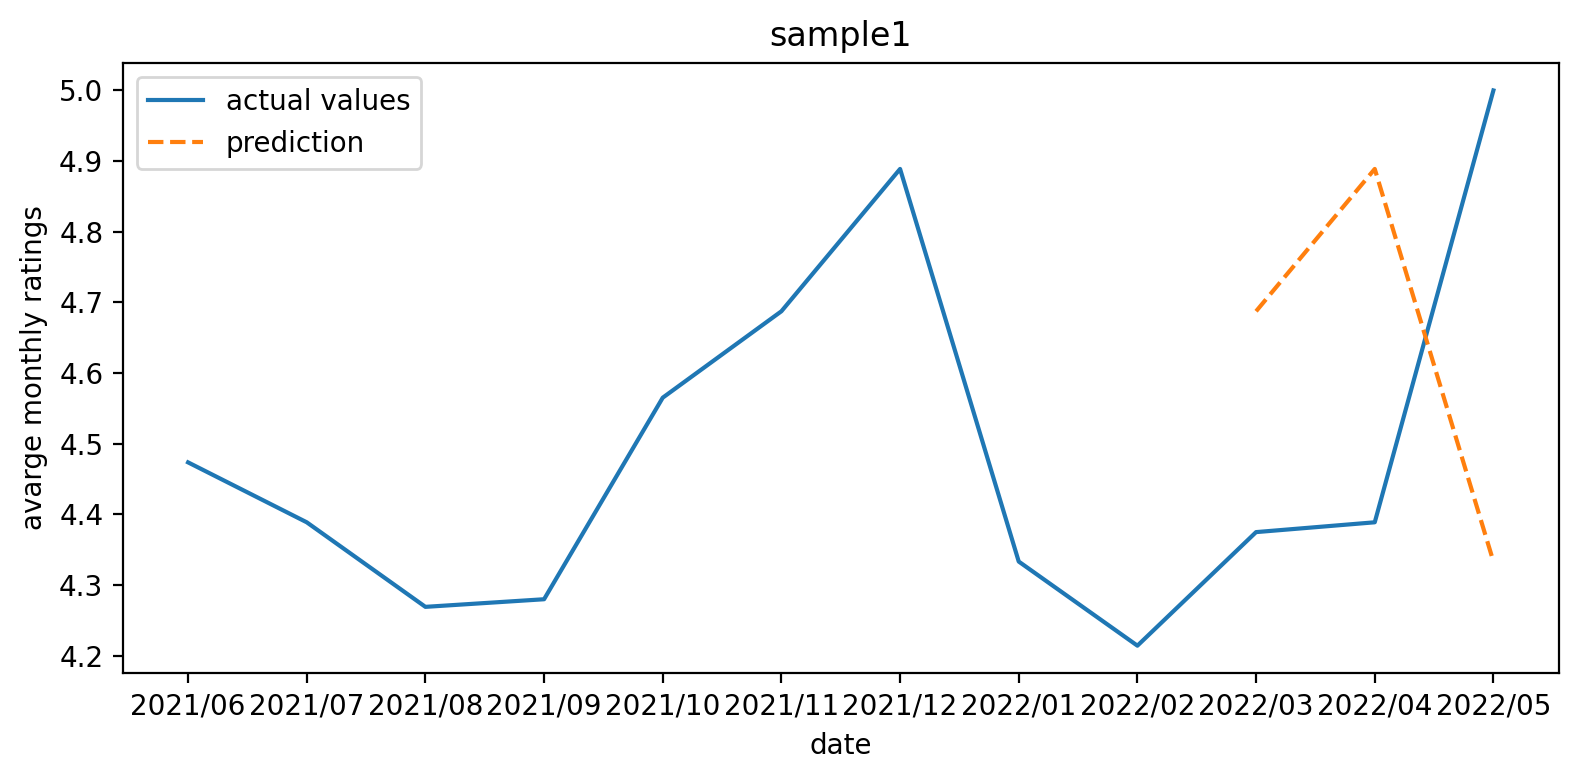

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

# fig = fig(figsize=(8, 6), dpi=80)
# year_sales = df_sales.groupby(by=df_sales.index.get_level_values(2).year)['sales'].sum()

ax.plot(df_sample1.index.to_list(), df_sample1.values, label="actual values")
ax.plot(df_sample1.index.to_list()[-3:], pred_sample1[-3:], label="prediction", linestyle="--")
ax.legend()

# ax.set_xticks([2013, 2014, 2015, 2016, 2017])

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()
# fig.savefig('sales.png')

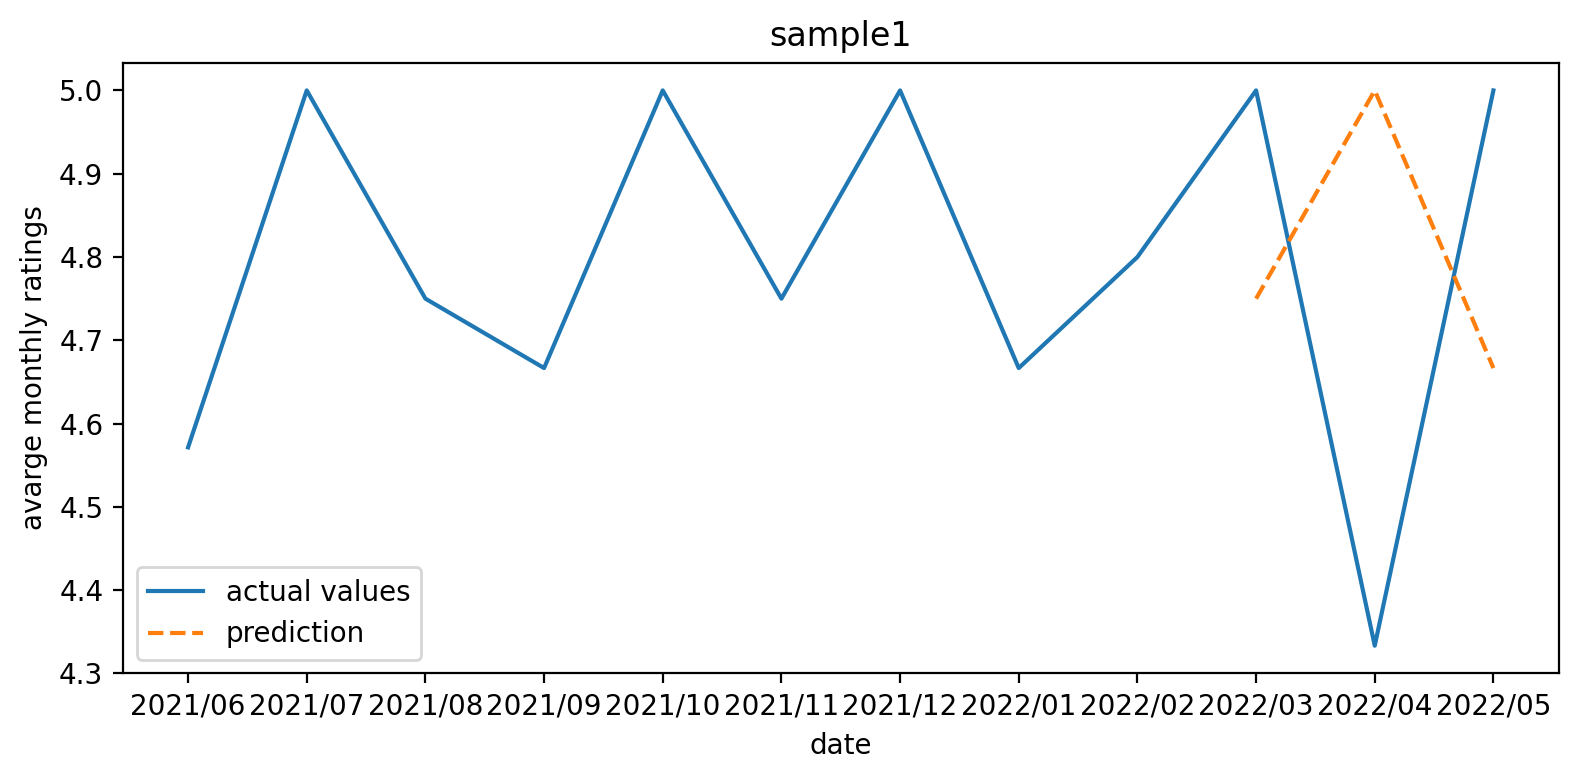

In [182]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

# fig = fig(figsize=(8, 6), dpi=80)
# year_sales = df_sales.groupby(by=df_sales.index.get_level_values(2).year)['sales'].sum()

ax.plot(df_sample2.index.to_list(), df_sample2.values, label="actual values")
ax.plot(df_sample2.index.to_list()[-3:], pred_sample2[-3:], label="prediction", linestyle="--")
ax.legend()

# ax.set_xticks([2013, 2014, 2015, 2016, 2017])

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()
# fig.savefig('sales.png')

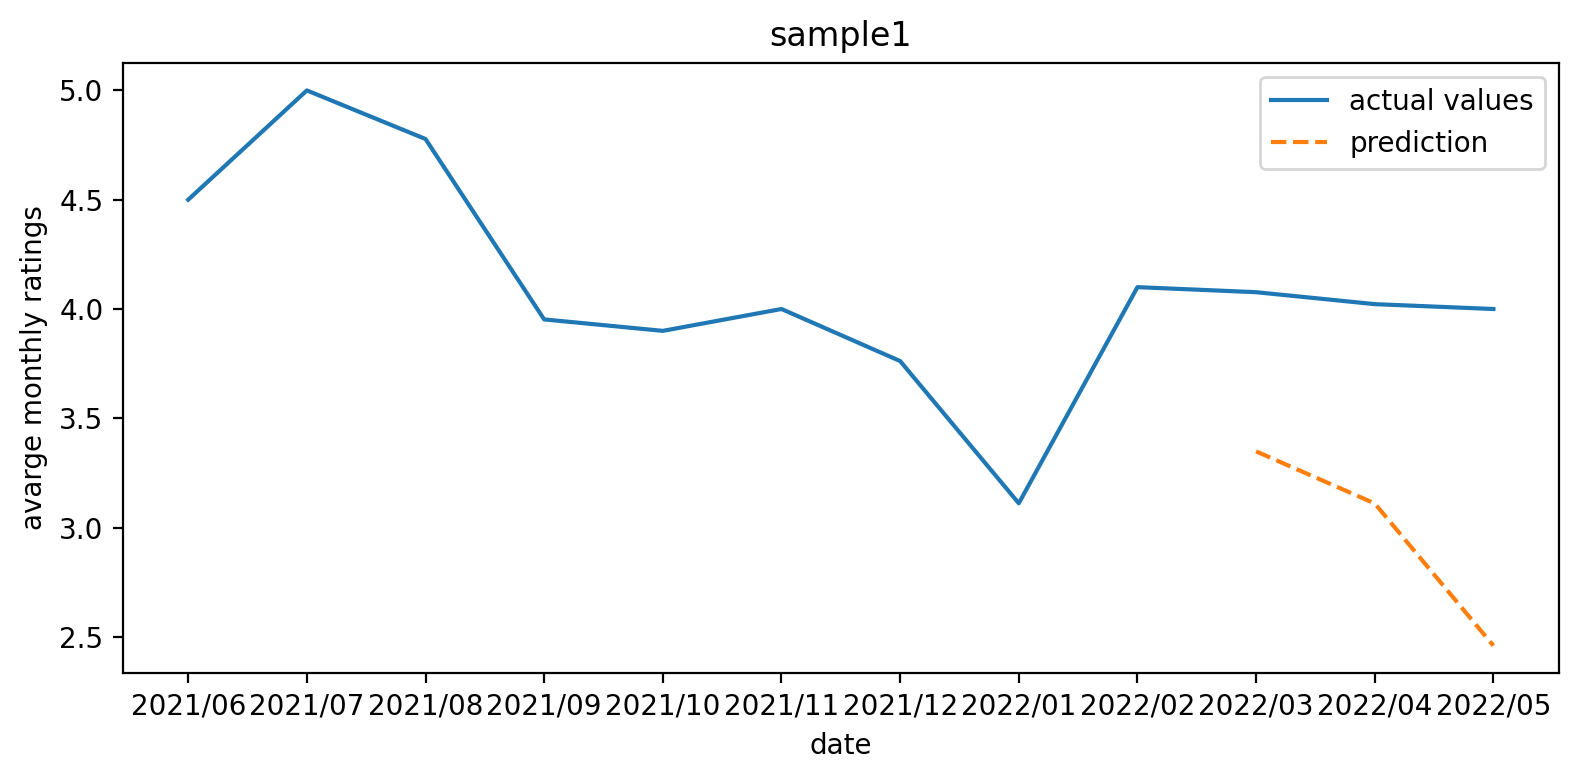

In [183]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

# fig = fig(figsize=(8, 6), dpi=80)
# year_sales = df_sales.groupby(by=df_sales.index.get_level_values(2).year)['sales'].sum()

ax.plot(df_sample3.index.to_list(), df_sample3.values, label="actual values")
ax.plot(df_sample3.index.to_list()[-3:], pred_sample3[-3:], label="prediction", linestyle="--")
ax.legend()

# ax.set_xticks([2013, 2014, 2015, 2016, 2017])

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()
# fig.savefig('sales.png')

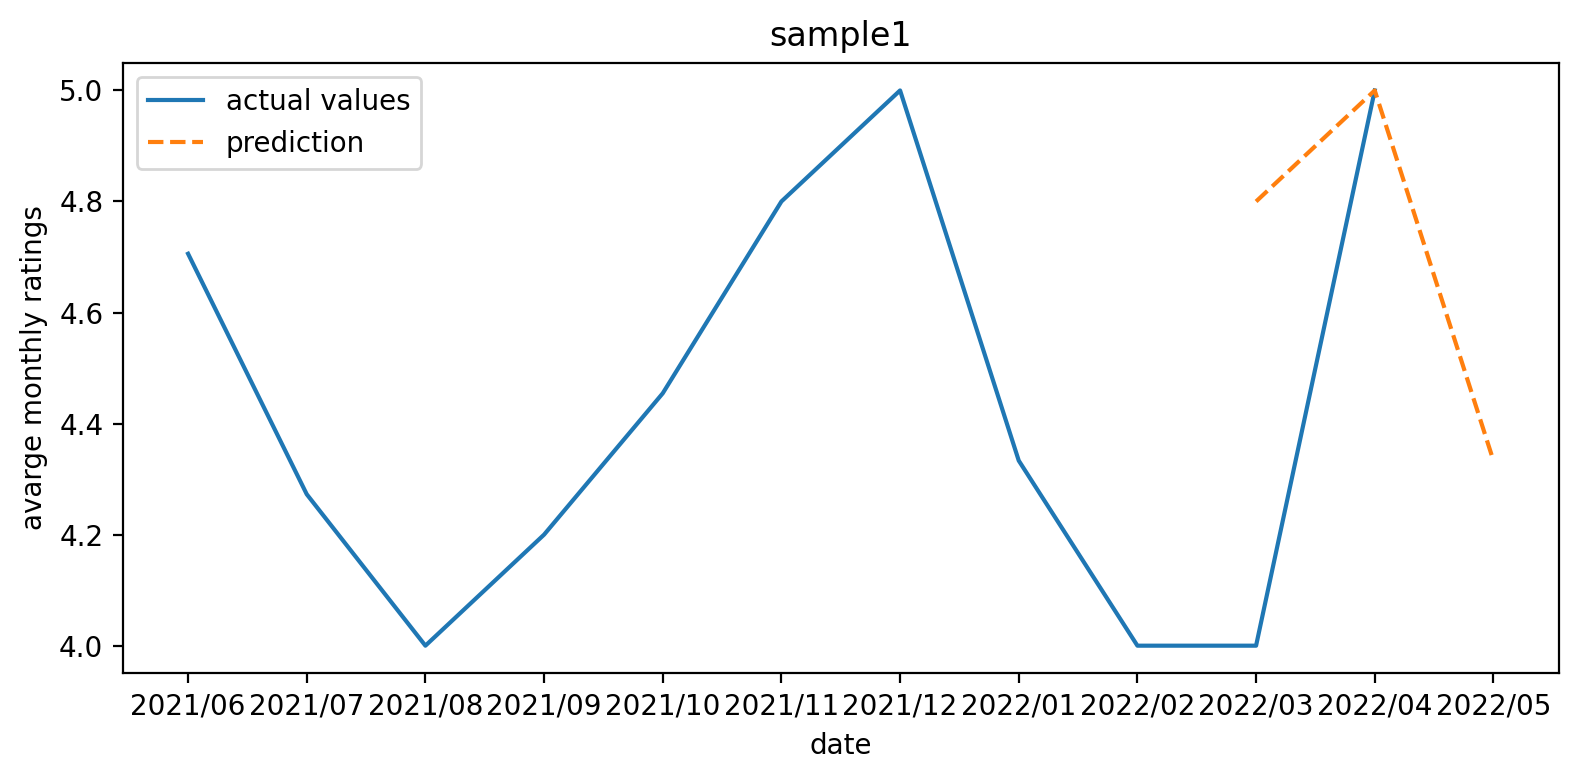

In [184]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

# fig = fig(figsize=(8, 6), dpi=80)
# year_sales = df_sales.groupby(by=df_sales.index.get_level_values(2).year)['sales'].sum()

ax.plot(df_sample4.index.to_list(), df_sample4.values, label="actual values")
ax.plot(df_sample4.index.to_list()[-3:], pred_sample4[-3:], label="prediction", linestyle="--")
ax.legend()

# ax.set_xticks([2013, 2014, 2015, 2016, 2017])

ax.set_title('sample1')
ax.set_xlabel('date')
ax.set_ylabel('avarge monthly ratings')

plt.tight_layout()
plt.show()
# fig.savefig('sales.png')

In [153]:
df_sample3.index.to_list()[-3:]

['2022/03', '2022/04', '2022/05']

In [150]:
pred_sample4

[[4.705882352941177],
 [4.2727272727272725],
 [4.0],
 [4.2],
 [4.454545454545454],
 [4.8],
 [5.0],
 [4.333333333333333],
 [4.0],
 [4.4184987124765875],
 [4.4184987124765875],
 [4.4184987124765875]]

In [112]:
pred_sample4

[[4.0], [5.0], [5.0], [4.0], [4.0]]